In [2]:
import pandas as pd

In [4]:
df=pd.read_csv("C:\slary_employee.csv")

In [5]:
df

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


In [7]:
df.isnull().sum()

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

In [14]:
df.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'Education Level', 'Job Title',
       'Years of Experience', 'Salary', 'Country', 'Race'],
      dtype='object')

In [16]:
df.drop(columns='Unnamed: 0', inplace=True)

In [17]:
df['Gender'].value_counts()

Gender
Male      3671
Female    3013
Other       14
Name: count, dtype: int64

In [18]:
df['Race'].value_counts()

Race
White               1962
Asian               1603
Korean               457
Australian           452
Chinese              444
Black                437
African American     354
Mixed                334
Welsh                333
Hispanic             322
Name: count, dtype: int64

## Filtering in pandas

### Using DataFrame 

In [20]:
#filtering only korean peoplrs
f1=df[df['Race']=='Korean']
print(f1)

       Age  Gender    Education Level                         Job Title  \
7     31.0    Male         Bachelor's                     Sales Manager   
12    35.0    Male         Bachelor's                 Financial Analyst   
20    34.0  Female           Master's                  Business Analyst   
29    33.0    Male           Master's                  Product Designer   
42    30.0    Male         Bachelor's                  Network Engineer   
...    ...     ...                ...                               ...   
6666  27.0    Male        High School         Digital Marketing Manager   
6670  37.0    Male  Bachelor's Degree       Junior Sales Representative   
6677  36.0  Female                PhD  Senior Product Marketing Manager   
6696  28.0    Male                PhD              Sales Representative   
6702  46.0    Male    Master's Degree                 Marketing Manager   

      Years of Experience    Salary Country    Race  
7                     4.0   80000.0   China  

In [25]:
#selecting only female which races black

f2=df[['Gender','Race']][(df['Race']=='Black') & (df['Gender']=='Female')]
print(f2)

      Gender   Race
28    Female  Black
54    Female  Black
74    Female  Black
78    Female  Black
132   Female  Black
...      ...    ...
6629  Female  Black
6643  Female  Black
6647  Female  Black
6653  Female  Black
6703  Female  Black

[192 rows x 2 columns]


In [34]:
#find the male students whose salary is grather than avg salary obtained by all employees in uk
avg_salar=df['Salary'].mean()
f3=df[(df['Salary']>avg_salar) & (df['Gender']=='Male') & (df['Country']=='UK')]
print(f3)

       Age Gender    Education Level                  Job Title  \
21    47.0   Male           Master's           VP of Operations   
44    41.0   Male           Master's        Strategy Consultant   
72    45.0   Male                PhD          Research Director   
90    36.0   Male                PhD        Principal Scientist   
121   53.0   Male           Master's      Director of Marketing   
...    ...    ...                ...                        ...   
6538  41.0   Male  Bachelor's Degree  Content Marketing Manager   
6580  38.0   Male    Master's Degree          Marketing Manager   
6632  46.0   Male    Master's Degree      Director of Marketing   
6646  46.0   Male    Master's Degree          Marketing Manager   
6676  42.0   Male  Bachelor's Degree  Content Marketing Manager   

      Years of Experience    Salary Country   Race  
21                   19.0  190000.0      UK  White  
44                   13.0  130000.0      UK  Asian  
72                   16.0  190000.0 

In [35]:
#Filtering employees whose education level master's or Phd
f4=df[(df['Education Level']=="Master's") | (df['Education Level']=='PhD')]
print(f4)

       Age  Gender Education Level                         Job Title  \
1     28.0  Female        Master's                      Data Analyst   
2     45.0    Male             PhD                    Senior Manager   
4     52.0    Male        Master's                          Director   
6     42.0  Female        Master's                   Product Manager   
9     38.0    Male             PhD                  Senior Scientist   
...    ...     ...             ...                               ...   
6682  28.0    Male             PhD                 Marketing Manager   
6685  49.0  Female             PhD  Senior Product Marketing Manager   
6691  36.0  Female             PhD                 Marketing Manager   
6696  28.0    Male             PhD              Sales Representative   
6699  49.0  Female             PhD             Director of Marketing   

      Years of Experience    Salary    Country        Race  
1                     3.0   65000.0        USA    Hispanic  
2            

### Using Query Function

In [46]:
#find employees whose age is less than ave age and Country is USA
avg_age=df['Age'].mean()
avg_age #33.62

f5=df.query(f"Age<{avg_age} and Country=='USA'")
print(f5)

       Age  Gender    Education Level                    Job Title  \
1     28.0  Female           Master's                 Data Analyst   
5     29.0    Male         Bachelor's            Marketing Analyst   
16    33.0  Female           Master's            Marketing Manager   
32    29.0    Male           Master's               Data Scientist   
45    28.0  Female         Bachelor's                   Copywriter   
...    ...     ...                ...                          ...   
6654  28.0    Male                PhD            Marketing Manager   
6658  32.0    Male        High School  Junior Sales Representative   
6661  26.0  Female        High School              Sales Associate   
6681  33.0  Female  Bachelor's Degree        Director of Marketing   
6689  26.0  Female        High School              Sales Associate   

      Years of Experience   Salary Country              Race  
1                     3.0  65000.0     USA          Hispanic  
5                     2.0  55000.

In [52]:
# filtering employees whose race is not   African American and whose gender is femlae
f6=df.query("Race !='  African American' and Gender=='Male'")
print(f6)

       Age Gender    Education Level                    Job Title  \
0     32.0   Male         Bachelor's            Software Engineer   
2     45.0   Male                PhD               Senior Manager   
4     52.0   Male           Master's                     Director   
5     29.0   Male         Bachelor's            Marketing Analyst   
7     31.0   Male         Bachelor's                Sales Manager   
...    ...    ...                ...                          ...   
6694  27.0   Male        High School    Digital Marketing Manager   
6696  28.0   Male                PhD         Sales Representative   
6698  37.0   Male  Bachelor's Degree  Junior Sales Representative   
6700  32.0   Male        High School              Sales Associate   
6702  46.0   Male    Master's Degree            Marketing Manager   

      Years of Experience    Salary    Country        Race  
0                     5.0   90000.0         UK       White  
2                    15.0  150000.0     Canada   

### Uisng .loc function

In [54]:
# filter employees data whose salary is greather than averege salary od all employees and age is less than average age of all employees
f7=df.loc[(df['Salary']>df['Salary'].mean()) & #115329.25 avg salary
           (df['Age']<df['Age'].mean())]  # 33.62 abg age
print(f7)

       Age  Gender    Education Level          Job Title  Years of Experience  \
375   31.0    Male           Master's     Data Scientist                  6.0   
376   28.0  Female         Bachelor's  Software Engineer                  3.0   
377   26.0    Male           Master's    Product Manager                  2.0   
379   30.0    Male                PhD     Data Scientist                  5.0   
380   29.0  Female         Bachelor's  Software Engineer                  4.0   
...    ...     ...                ...                ...                  ...   
6239  32.0    Male  Bachelor's Degree    Product Manager                  7.0   
6244  32.0  Female                PhD     Data Scientist                  9.0   
6246  33.0  Female    Master's Degree  Marketing Manager                  9.0   
6253  32.0    Male  Bachelor's Degree    Product Manager                  7.0   
6258  32.0  Female                PhD     Data Scientist                  9.0   

        Salary    Country  

In [58]:
#sort the datatframe in increasing order of age
f8=df.sort_values(by='Age')
print(f8)

       Age  Gender Education Level                    Job Title  \
5057  21.0  Female     High School  Junior Sales Representative   
5122  21.0  Female     High School  Junior Sales Representative   
5109  21.0  Female     High School  Junior Sales Representative   
5096  21.0  Female     High School  Junior Sales Representative   
5083  21.0  Female     High School  Junior Sales Representative   
...    ...     ...             ...                          ...   
1225  62.0    Male             PhD    Software Engineer Manager   
1258  62.0    Male             PhD    Software Engineer Manager   
1236  62.0    Male             PhD    Software Engineer Manager   
1305  62.0    Male             PhD    Software Engineer Manager   
1304  62.0    Male             PhD    Software Engineer Manager   

      Years of Experience    Salary    Country              Race  
5057                  0.0   25000.0  Australia        Australian  
5122                  0.0   25000.0      China           Chin

In [61]:
# Sort employees details in decreasing order of expers of experience 
f9=df.sort_values(by='Years of Experience', ascending=False)
print(f9)

       Age  Gender  Education Level                    Job Title  \
2421  60.0  Female              PhD    Software Engineer Manager   
2501  60.0  Female              PhD    Software Engineer Manager   
2481  57.0  Female              PhD    Software Engineer Manager   
2435  57.0  Female  Master's Degree          Full Stack Engineer   
2476  60.0  Female              PhD    Software Engineer Manager   
...    ...     ...              ...                          ...   
5122  21.0  Female      High School  Junior Sales Representative   
5109  21.0  Female      High School  Junior Sales Representative   
5096  21.0  Female      High School  Junior Sales Representative   
5083  21.0  Female      High School  Junior Sales Representative   
2585  23.0    Male              PhD    Software Engineer Manager   

      Years of Experience    Salary    Country              Race  
2421                 34.0  188651.0     Canada             Asian  
2501                 34.0  188651.0      China   

### Grouping

In [64]:
# find the sum of Salary of employees on the basis of Race 
f10=df.groupby('Race')['Salary'].sum()
print(f10)

Race
African American     39722219.0
Asian               184829216.0
Australian           51634978.0
Black                51828730.0
Chinese              49345856.0
Hispanic             35552065.0
Korean               53514589.0
Mixed                38854507.0
Welsh                37482695.0
White               229710482.0
Name: Salary, dtype: float64


In [67]:
#find the sum of salarys and age based on Country
f11=df.groupby('Country')[['Age','Salary']].sum()
print(f11)

               Age       Salary
Country                        
Australia  44745.0  153529623.0
Canada     44692.0  154437671.0
China      45493.0  156152455.0
UK         45117.0  154794720.0
USA        45160.0  153560868.0


In [76]:
#find the sum of  Years of Experience based on gender 
f12=df.groupby('Gender')['Years of Experience'].sum()
print(type(f12))
print(f12)

<class 'pandas.core.series.Series'>
Gender
Female    22357.0
Male      31634.5
Other       230.0
Name: Years of Experience, dtype: float64


In [77]:
#find the sum of  Years of Experience and salary based on gender  and Country
f12=df.groupby(['Gender','Country'])[['Years of Experience','Salary']].sum()
print(type(f12))
print(f12)


<class 'pandas.core.frame.DataFrame'>
                  Years of Experience      Salary
Gender Country                                   
Female Australia               4475.5  66258929.0
       Canada                  4197.5  62206902.0
       China                   4719.5  65773106.0
       UK                      4614.0  66050126.0
       USA                     4350.5  64780490.0
Male   Australia               6123.5  87166567.0
       Canada                  6564.0  91746728.0
       China                   6324.5  89929282.0
       UK                      6359.0  88355203.0
       USA                     6263.5  88445826.0
Other  Australia                  8.0    104127.0
       Canada                    89.0    484041.0
       China                     64.0    450067.0
       UK                        45.0    389391.0
       USA                       24.0    334552.0


In [4]:
import pandas as pd 
d1 = {'Name':['Jane','Ryan','Sutton','Richard','Alex','Alex','Jane','Sutton'],

'YOB':[2001, 2000, 2001, 1990, 1999, 1999, 2001, 2001],

'Age':[21, 22, 21, 32, 23, 23, 21, 21]}

data = pd.DataFrame(d1)

data

data.duplicated().sum()

3

In [7]:

tuple=(1,2,3,4)
tuple2=(4,5,6)

list={tuple}
# list2={tuple2}
# list.intersection(list2)


Assignment Questions
The link for the dataset:matches.csv

1.Write a program to drop the column toss_winner

2.Rename the column city to hostcity

3.Write a program to check the number of null values in all columns

4.Check the number of duplicates

5.In the city column,replace the missing values with ‘Unknown’ and then check for missing values.

6.Write a program to change the data type of column Date to datetime and check the same.

7.Drop the rows with index 1, 3 and 9

In [12]:
import pandas as pd

df=pd.read_csv("matches.csv")

In [13]:
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [14]:
# Write a program to drop the column toss_winner
df.drop(columns='toss_winner',inplace= True)

In [15]:
df

,id,season,city,date,team1,team2,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [16]:
#2.Rename the column city to hostcity
df.rename(columns={'city':'hostcity'})

,id,season,hostcity,date,team1,team2,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [17]:
#3.Write a program to check the number of null values in all columns
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [18]:
#4.Check the number of duplicates
df.duplicated().sum()

0

In [24]:
#5.In the city column,replace the missing values with ‘Unknown’ and then check for missing values.
df['city'].fillna('Unkown',inplace=True)


In [25]:
df.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [27]:
#6.Write a program to change the data type of column Date to datetime and check the same.
df['date']=pd.to_datetime(df['date'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               636 non-null    int64         
 1   season           636 non-null    int64         
 2   city             636 non-null    object        
 3   date             636 non-null    datetime64[ns]
 4   team1            636 non-null    object        
 5   team2            636 non-null    object        
 6   toss_decision    636 non-null    object        
 7   result           636 non-null    object        
 8   dl_applied       636 non-null    int64         
 9   winner           633 non-null    object        
 10  win_by_runs      636 non-null    int64         
 11  win_by_wickets   636 non-null    int64         
 12  player_of_match  633 non-null    object        
 13  venue            636 non-null    object        
 14  umpire1          635 non-null    object   

In [31]:
#7.Drop the rows with index 1, 3 and 9
df.drop([1,3,9])

,id,season,city,date,team1,team2,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


## Applying Pivot table 

In [1]:
#loading spofity top 100 most streamed csv file
import pandas as pd 
df=pd.read_csv('spotify-2023.csv',encoding = 'latin-1')

In [2]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [3]:
#checking null
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [6]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


### pivot table

quickly sumarize large amount od data 

By default the aggregation function used is mean

Syntax  pd.pivot_table(data,index,columns,values,aggfun)

In [7]:
#using pivoT_table create dataframe displaying year wise valence, danceability and energy
pivot1=pd.pivot_table(df,index=['released_year'],values=['valence_%','danceability_%','energy_%'])
pivot1.sample(10)

,danceability_%,energy_%,valence_%
released_year,,,
1985,63.500000,68.000000,37.000000
2023,70.283019,68.389937,55.213836
2010,64.166667,70.166667,38.666667
1999,77.400000,76.200000,45.200000
2014,63.250000,66.583333,48.166667
1959,57.000000,30.000000,84.000000
2021,69.231579,64.968421,52.968421
1987,45.000000,90.000000,67.000000
2011,57.888889,64.333333,53.777778


In [8]:
#using pivoT_table create dataframe displaying year wise max  valence, danceability and energy where year is column
pivot2=pd.pivot_table(df,columns='released_year',values=['valence_%','danceability_%','energy_%'],aggfunc='max')
pivot2

released_year,1930,1942,1946,1950,1957,1958,1959,1963,1970,1971,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
danceability_%,65,23,36,60,51,73,69,53,53,33,...,78,82,92,91,76,90,84,96,95,93
energy_%,80,25,15,32,34,71,36,77,82,61,...,89,94,89,80,74,90,91,90,97,96
valence_%,49,19,22,86,94,94,96,84,96,39,...,95,63,97,93,91,80,92,96,97,96


In [10]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,1.567931,2018.457772,6.018360,13.696450,4849.898409,11.722154,60.161567,49.473684,2.451652,122.565483,67.391677,51.201958,64.362301,26.309670,1.676867,18.168911,10.526316
std,0.876211,10.829267,3.572554,9.299663,7741.126455,18.617668,74.923594,49.570455,5.397024,28.174803,14.688458,23.620978,16.107587,25.470972,8.767328,13.541996,10.219987
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2021.000000,3.000000,5.000000,829.000000,0.000000,12.000000,6.000000,0.000000,99.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,5.000000,13.000000,2040.000000,3.000000,32.000000,34.000000,0.000000,120.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,4890.000000,16.000000,78.000000,84.000000,2.000000,141.000000,79.000000,70.000000,76.000000,41.000000,0.000000,24.000000,12.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,532.000000,275.000000,45.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [14]:
#using pivot table display the realesed years wise mimimun of  energy ,liveness and bpm and acousticness
pivot3=pd.pivot_table(data=df,index='released_year', values=['energy_%','acousticness_%','liveness_%','bpm'],aggfunc='min')
pivot3

,acousticness_%,bpm,energy_%,liveness_%
released_year,,,,
1930,22,130,80,7
1942,91,96,25,40
1946,84,139,15,11
1950,88,143,32,34
1957,73,175,34,10
1958,77,113,32,7
1959,81,107,24,8
1963,39,92,60,8
1970,7,110,69,17


In [22]:
#uisng pivot table crate dataframe displayiong yrea and tarck name wise mean of  energy ,liveness and bpm and acousticness 
pivot4=pd.pivot_table(data=df,index=['track_name','released_year'], values=['energy_%','acousticness_%','liveness_%','bpm'],aggfunc='mean')
pivot4.sample(10)

,,acousticness_%,bpm,energy_%,liveness_%
track_name,released_year,,,,
Those Eyes,2019,73.0,120.0,35.0,31.0
One Dance,2016,1.0,104.0,63.0,36.0
TULUM,2023,39.0,168.0,87.0,11.0
Forever,2019,92.0,80.0,46.0,11.0
Cool for the Summer,2015,1.0,114.0,62.0,8.0
Limbo,2022,3.0,75.0,62.0,11.0
Still Don't Know My Name,2019,47.0,88.0,63.0,21.0
In The Stars,2022,34.0,78.0,54.0,14.0
Punto G,2022,25.0,92.0,76.0,10.0


In [24]:
pivot5=pd.pivot_table(data=df,columns=['track_name','released_year'], values=['energy_%','acousticness_%','liveness_%','bpm'],aggfunc='mean')
pivot5

track_name,'Till I Collapse,(It Goes Like) Nanana - Edit,10 Things I Hate About You,10:35,2 Be Loved (Am I Ready),2055,212,25k jacket (feat. Lil Baby),295,69,...,she's all i wanna be,this is what falling in love feels like,thought i was playing,un x100to,vampire,we fell in love in october,you broke me first,ýýý98 Braves,ýýýýýýýýýýýý,ýýýýýýýýýýýýýýýýýýýýý
released_year,2002,2023,2022,2022,2022,2021,2022,2022,2021,2023,...,2022,2021,2022,2023,2023,2018,2020,2023,2023,2020
acousticness_%,7.0,12.0,1.0,7.0,9.0,46.0,66.0,16.0,21.0,11.0,...,1.0,62.0,0.0,23.0,17.0,11.0,79.0,10.0,11.0,17.0
bpm,171.0,130.0,154.0,120.0,156.0,161.0,154.0,115.0,90.0,93.0,...,160.0,129.0,148.0,83.0,138.0,130.0,124.0,142.0,166.0,158.0
energy_%,85.0,88.0,79.0,79.0,77.0,52.0,52.0,54.0,76.0,62.0,...,64.0,44.0,73.0,72.0,53.0,37.0,37.0,67.0,94.0,76.0
liveness_%,8.0,8.0,17.0,18.0,8.0,12.0,9.0,13.0,11.0,11.0,...,12.0,8.0,7.0,27.0,31.0,16.0,9.0,26.0,37.0,19.0


In [30]:
pivot6=pd.pivot_table(data=df,index=['released_year'],columns='track_name' ,values=['energy_%','acousticness_%','liveness_%','bpm'],aggfunc='mean')
pivot6.sample(10)


acousticness_%                               \
track_name    'Till I Collapse (It Goes Like) Nanana - Edit   
released_year                                                 
1958                       NaN                          NaN   
2023                       NaN                         12.0   
1979                       NaN                          NaN   
1995                       NaN                          NaN   
1999                       NaN                          NaN   
2013                       NaN                          NaN   
1983                       NaN                          NaN   
2003                       NaN                          NaN   
2012                       NaN                          NaN   
1986                       NaN                          NaN   

                                                                             \
track_name    10 Things I Hate About You 10:35 2 Be Loved (Am I Ready) 2055   
released_year                                                                 
1958                                 NaN   NaN                     NaN  NaN   
2023                                 NaN   NaN                     NaN  NaN   
1979                                 NaN   NaN                     NaN  NaN   
1995                                 NaN   NaN                     NaN  NaN   
1999                                 NaN   NaN                     NaN  NaN   
2013                                 NaN   NaN                     NaN  NaN   
1983                                 NaN   NaN                     NaN  NaN   
2003                                 NaN   NaN                     NaN  NaN   
2012                                 NaN   NaN                     NaN  NaN   
1986                                 NaN   NaN                     NaN  NaN   

                                                         ...  \
track_name    212 25k jacket (feat. Lil Baby) 295    69  ...   
released_year                                            ...   
1958          NaN                         NaN NaN   NaN  ...   
2023          NaN                         NaN NaN  11.0  ...   
1979          NaN                         NaN NaN   NaN  ...   
1995          NaN                         NaN NaN   NaN  ...   
1999          NaN                         NaN NaN   NaN  ...   
2013          NaN                         NaN NaN   NaN  ...   
1983          NaN                         NaN NaN   NaN  ...   
2003          NaN                         NaN NaN   NaN  ...   
2012          NaN                         NaN NaN   NaN  ...   
1986          NaN                         NaN NaN   NaN  ...   

                        liveness_%                                          \
track_name    she's all i wanna be this is what falling in love feels like   
released_year                                                                
1958                           NaN                                     NaN   
2023                           NaN                                     NaN   
1979                           NaN                                     NaN   
1995                           NaN                                     NaN   
1999                           NaN                                     NaN   
2013                           NaN                                     NaN   
1983                           NaN                                     NaN   
2003                           NaN                                     NaN   
2012                           NaN                                     NaN   
1986                           NaN                                     NaN   

                                                       \
track_name    thought i was playing un x100to vampire   
released_year                                           
1958                            NaN       NaN     NaN   
2023                            NaN      27.0    31.0   
1979                            NaN

### apply()

It is used to aply dunction to a series or dataframe

it works on entire dataframe

In [31]:
import numpy as np
df[['acousticness_%','energy_%','liveness_%']].apply(np.max)

acousticness_%    97
energy_%          97
liveness_%        97
dtype: int64

In [34]:
def generation(years):
    if(years<2000):
        return '90  Generation'
    elif(years>2000 and years<2010):
        return '20 s Generation'
    elif(years>2010):
        return 'New Genration'

In [36]:
df['Genration']=df['released_year'].apply(generation)
df[['released_year','Genration']].sample(20)

,released_year,Genration
371,2020,New Genration
572,2021,New Genration
525,2021,New Genration
85,2023,New Genration
366,2017,New Genration
813,2022,New Genration
223,2023,New Genration
148,2019,New Genration
37,2014,New Genration
265,1997,90 Generation


### where()

It replaces values where the condition is false

where condition is true keep the original values if wjere is False replace with correspomdition vale from other

In [65]:
where1=df['Genration'].value_counts()
where1
where1=df['Genration'].where(df['Genration']!='New Genration',"Modern")
#where(df['Genration']!='New Genration' this condition is false then it retien Modern
where1.sample(20)

667            Modern
285            Modern
460    90  Generation
762            Modern
63             Modern
15             Modern
295            Modern
796            Modern
687            Modern
57             Modern
184            Modern
105            Modern
889            Modern
777            Modern
110            Modern
384            Modern
367            Modern
280            Modern
919            Modern
369            Modern
Name: Genration, dtype: object

In [66]:
df['energy_%'].mean()

64.36230110159119

In [67]:
where2=df['energy_%'].where(df['energy_%']<df['energy_%'].mean(),'High Energy')
#where(df['energy_%']<df['energy_%'].mean()  this condition is false so it replace with 'High
#where3=df['energy_%'].where(df['energy_%']>df['energy_%'].mean(),'low Energy')
where2


0      High Energy
1      High Energy
2               53
3      High Energy
4      High Energy
          ...     
948             39
949             24
950    High Energy
951    High Energy
952    High Energy
Name: energy_%, Length: 817, dtype: object

### Uisng lambda function with apply()

In [69]:
max_energy=df[['energy_%']].apply(lambda x:x.max())
print(max_energy)
min_enrgy=df[['energy_%']].apply(lambda y:y.min())
print(min_enrgy)

energy_%    97
dtype: int64
energy_%    14
dtype: int64


In [71]:
dif=df[['energy_%']].apply(lambda x:x.max()-x.min())
print(dif)

energy_%    83
dtype: int64


### assign()

used create new column to dataframe 

return new object with all originall columns in addition to new ones

In [74]:
df1=df.assign(Revised_bpm=lambda x:df['liveness_%']+df['speechiness_%'])
df1.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Genration,Revised_bpm
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,Major,80,89,83,31,0,8,4,New Genration,12
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,Major,71,61,74,7,0,10,4,New Genration,14
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,Major,51,32,53,17,0,31,6,New Genration,37
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,Major,55,58,72,11,0,11,15,New Genration,26
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,Minor,65,23,80,14,63,11,6,New Genration,17


In [75]:
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Genration
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,New Genration
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,New Genration
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,New Genration
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,New Genration
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,New Genration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,New Genration
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,New Genration
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,New Genration
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,New Genration


In [77]:
#energy to dance ration 
df2=df.assign(Energy_Dance_Ratio=lambda x: df['energy_%']/df['danceability_%'])
df2.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Genration,Energy_Dance_Ratio
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,Major,80,89,83,31,0,8,4,New Genration,1.037500
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,Major,71,61,74,7,0,10,4,New Genration,1.042254
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,Major,51,32,53,17,0,31,6,New Genration,1.039216
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,Major,55,58,72,11,0,11,15,New Genration,1.309091
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,Minor,65,23,80,14,63,11,6,New Genration,1.230769


In [78]:
#creating multiple colums suing asisgn

df3=df.assign(Revised_bpm= lambda x:df['bpm']*2,Dance_and_liveness_Ratio=lambda x: df['energy_%']/df['liveness_%'])
df3.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Genration,Revised_bpm,Dance_and_liveness_Ratio
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,80,89,83,31,0,8,4,New Genration,250,10.375000
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,71,61,74,7,0,10,4,New Genration,184,7.400000
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,51,32,53,17,0,31,6,New Genration,276,1.709677
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,55,58,72,11,0,11,15,New Genration,340,6.545455
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,65,23,80,14,63,11,6,New Genration,288,7.272727


In [79]:
df3.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'Genration', 'Revised_bpm', 'Dance_and_liveness_Ratio'],
      dtype='object')

### Assignment

given data matches.csv

In [4]:
import pandas as pd
df=pd.read_csv("matches.csv")
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [8]:
# 1.Find out the number of venues
venu_count=df['venue'].nunique()
venu_count #there total 35 venus

35

In [10]:
# 2 Find out the number of times each team emerged as the winner
team_win=df['winner'].value_counts()
team_win

winner
Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: count, dtype: int64

In [13]:
#3 Find out number of times the toss winner chose bat and the number of times the winner chosefield.
toss_winner=df['toss_decision'].value_counts()
toss_winner

toss_decision
field    363
bat      273
Name: count, dtype: int64

In [16]:
# 4 Replace the toss_decision value with bowl_first where toss_decision is field
rtoss_deci=df['toss_decision'].where(df['toss_decision']!='field','Bowl_First')
rtoss_deci.sample(15)

181           bat
103    Bowl_First
357           bat
411    Bowl_First
153    Bowl_First
373    Bowl_First
35     Bowl_First
299    Bowl_First
625    Bowl_First
67     Bowl_First
102           bat
123           bat
169    Bowl_First
87            bat
182    Bowl_First
Name: toss_decision, dtype: object

In [18]:
# 5 Sort the dataset in descending order of win by runs and print the column win_by_runs
sort_by_runs=df['win_by_runs'].sort_values(ascending=False).head(10)
sort_by_runs


43     146
619    144
59     140
556    138
410    130
295    111
114    105
182     98
8       97
541     97
Name: win_by_runs, dtype: int64

In [22]:
# 6 Find the date where the winner is RoyalChallengers Bangalore with runs more than 30
wineer=df[(df['winner']=='Royal Challengers Bangalore') & (df['win_by_runs']>30)]
wineer[['date','winner','win_by_runs']]

,date,winner,win_by_runs
118,2009-04-18,Royal Challengers Bangalore,75
191,2010-03-23,Royal Challengers Bangalore,36
279,2011-05-06,Royal Challengers Bangalore,85
305,2011-05-27,Royal Challengers Bangalore,43
337,2012-04-23,Royal Challengers Bangalore,46
361,2012-05-11,Royal Challengers Bangalore,35
410,2013-04-23,Royal Challengers Bangalore,130
556,2015-05-06,Royal Challengers Bangalore,138
561,2015-05-10,Royal Challengers Bangalore,39
573,2015-05-20,Royal Challengers Bangalore,71


In [26]:
# 7.Find the max win by runs and win by wickets using the apply function
import numpy as np
win_by_runs_wic=df[['win_by_runs','win_by_wickets']].apply(np.max)
win_by_runs_wic

win_by_runs       146
win_by_wickets     10
dtype: int64

## Merge()

used to combine the data on common columns

merge can be following type 
* inner
* left
* right
* outer

In [29]:
d1={'E_ID':[12,13,15,17,18,14],
     'Products':['oven','gas','oven','television','gas','television']}
df1=pd.DataFrame(d1)
df1

,E_ID,Products
0,12,oven
1,13,gas
2,15,oven
3,17,television
4,18,gas
5,14,television


In [32]:
d2={
    'E_ID':[13,14,15,17,18,19],
    'Contry':['Skypie','RedLine','Marine_Fort','Alabasta','Waetr7','Fishman_Island']}
df2=pd.DataFrame(d2)
df2

,E_ID,Contry
0,13,Skypie
1,14,RedLine
2,15,Marine_Fort
3,17,Alabasta
4,18,Waetr7
5,19,Fishman_Island


In [33]:
#we have E_id commom between two data frames so we can perform merge operation
df3=pd.merge(df1,df2 , on='E_ID',how='inner') # using inner return all the rows maching form both table
df3 

,E_ID,Products,Contry
0,13,gas,Skypie
1,15,oven,Marine_Fort
2,17,television,Alabasta
3,18,gas,Waetr7
4,14,television,RedLine


In [34]:
df3=pd.merge(df1,df2 , on='E_ID',how='left') # using left return all the rows form left table and maching rows from right table
df3

,E_ID,Products,Contry
0,12,oven,NaN
1,13,gas,Skypie
2,15,oven,Marine_Fort
3,17,television,Alabasta
4,18,gas,Waetr7
5,14,television,RedLine


In [35]:
df3=pd.merge(df1,df2 , on='E_ID',how='right') #using right -return all the  rows form right table and maching rows from left table 
df3

,E_ID,Products,Contry
0,13,gas,Skypie
1,14,television,RedLine
2,15,oven,Marine_Fort
3,17,television,Alabasta
4,18,gas,Waetr7
5,19,NaN,Fishman_Island


In [36]:
df3=pd.merge(df1,df2 , on='E_ID',how='outer') #using outer return all the rows form right table and left with matching and non matching 
df3

,E_ID,Products,Contry
0,12,oven,NaN
1,13,gas,Skypie
2,15,oven,Marine_Fort
3,17,television,Alabasta
4,18,gas,Waetr7
5,14,television,RedLine
6,19,NaN,Fishman_Island


In [37]:
#loading spofity top 100 most streamed csv file
import pandas as pd 
df=pd.read_csv('spotify-2023.csv',encoding = 'latin-1')

In [38]:
#slitting data from the tables
top10=df.iloc[:10,:]
next10=df.iloc[11:21,:]


In [43]:
top10.head(10)


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


In [40]:
next10.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
11,Super Shy,NewJeans,1,2023,7,7,422,55,58255150,37,...,150,F,Minor,78,52,82,18,0,15,7
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,300,...,118,NaN,Major,71,65,68,6,0,3,7
13,Daylight,David Kushner,1,2023,4,14,3528,98,387570742,80,...,130,D,Minor,51,32,43,83,0,9,3
14,As It Was,Harry Styles,1,2022,3,31,23575,130,2513188493,403,...,174,F#,Minor,52,66,73,34,0,31,6
15,Kill Bill,SZA,1,2022,12,8,8109,77,1163093654,183,...,89,G#,Major,64,43,73,5,17,16,4
16,Cupid - Twin Ver.,Fifty Fifty,1,2023,2,24,2942,77,496795686,91,...,120,B,Minor,78,76,59,43,0,34,3
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,2023,7,13,873,104,30546883,80,...,78,NaN,Major,44,14,9,96,0,10,3
18,Classy 101,"Feid, Young Miko",2,2023,3,31,2610,40,335222234,43,...,100,B,Major,86,67,66,14,0,12,16
19,Like Crazy,Jimin,1,2023,3,24,596,68,363369738,8,...,120,G,Major,63,36,73,0,0,36,4
20,LADY GAGA,"Gabito Ballesteros, Junior H, Peso Pluma",3,2023,6,22,332,26,86444842,11,...,140,F,Minor,65,87,74,22,0,42,4


## append()  

merge two dataframes one after another

In [ ]:
res=top10.append(next10)

## concat()

used to combining dataframes acros rows and columns works with particular axis

In [46]:
concat_both=pd.concat([top10,next10]) #axis=0
concat_both

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


In [47]:
conctt_axis1=pd.concat([top10,next10],axis=1) # conacte the dataframe next to one dataframe column wise
conctt_axis1

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2.0,2023.0,7.0,14.0,553.0,147.0,141381703,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LALA,Myke Towers,1.0,2023.0,3.0,23.0,1474.0,48.0,133716286,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,vampire,Olivia Rodrigo,1.0,2023.0,6.0,30.0,1397.0,113.0,140003974,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cruel Summer,Taylor Swift,1.0,2019.0,8.0,23.0,7858.0,100.0,800840817,116.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,WHERE SHE GOES,Bad Bunny,1.0,2023.0,5.0,18.0,3133.0,50.0,303236322,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Sprinter,"Dave, Central Cee",2.0,2023.0,6.0,1.0,2186.0,91.0,183706234,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2.0,2023.0,3.0,16.0,3090.0,50.0,725980112,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Columbia,Quevedo,1.0,2023.0,7.0,7.0,714.0,43.0,58149378,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,fukumean,Gunna,1.0,2023.0,5.0,15.0,1096.0,83.0,95217315,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2.0,2023.0,3.0,17.0,2953.0,44.0,553634067,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## join()

join the columns with one other dataframe either by index or key column

In [48]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [57]:
#splitting 
d1=df.iloc[:20,:5]
d2=df.iloc[:20,5:11]

In [60]:
d1.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month'],
      dtype='object')

In [61]:
d2.columns

Index(['released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts'],
      dtype='object')

In [62]:
d1.head()

,track_name,artist(s)_name,artist_count,released_year,released_month
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7
1,LALA,Myke Towers,1,2023,3
2,vampire,Olivia Rodrigo,1,2023,6
3,Cruel Summer,Taylor Swift,1,2019,8
4,WHERE SHE GOES,Bad Bunny,1,2023,5


In [63]:
d2.head()

,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts
0,14,553,147,141381703,43,263
1,23,1474,48,133716286,48,126
2,30,1397,113,140003974,94,207
3,23,7858,100,800840817,116,207
4,18,3133,50,303236322,84,133


In [64]:
#joins based on join
res_join=d1.join(d2)
res_join

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,213
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,222
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,89
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,210
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,110


In [70]:
#joins baseed on keys  indexes
t1=pd.DataFrame({'key':['K0','K1','K2','K3','K4','K5'] ,
                 'A':['A0','A1','A2','A3','A4','A5']})

t2=pd.DataFrame({ 'key':['K0','K1','K2'],'B':['B0','B1','B2']})


In [73]:
res=t1.join(t2,lsuffix='_1' ,rsuffix='_2')
res

,key_1,A,key_2,B
0,K0,A0,K0,B0
1,K1,A1,K1,B1
2,K2,A2,K2,B2
3,K3,A3,NaN,NaN
4,K4,A4,NaN,NaN
5,K5,A5,NaN,NaN


In [77]:
t1=t1.set_index('key')
t2=t2.set_index('key')

In [80]:
join_With_index=t1.join(t2)
join_With_index

,A,B
key,,
K0,A0,B0
K1,A1,B1
K2,A2,B2
K3,A3,NaN
K4,A4,NaN
K5,A5,NaN


In [2]:
import pandas as pd
student_data=pd.DataFrame({'school_code':['s001','s002','s003','s001','s002','s004'],
                          'class':['V','V','VI','VI','V','VI'],
                          'name':['AlbertoFranco','GinoMcneill','RyanParkes','EeshaHinton','GinoMcneill','DavidParkes'],
                          'date_Of_Birth':['15/05/2002','17/05/2002','16/02/1999','25/09/1998','11/05/2002','15/09/1997'],
                          'age':[12,12,13,13,14,12],'height':[173,192,186,167,151,159],'weight':[35,32,33,30,31,32],
                          'address':['street1','street2','street3','street1','street2','street4']},
                          index=['S1','S2','S3','S4','S5','S6'])

In [4]:
df1=student_data['school_code']

In [6]:
by_school=student_data.groupby('school_code').agg({'age':['mean','min','max']})
by_school

age        
             mean min max
school_code              
s001         12.5  12  13
s002         13.0  12  14
s003         13.0  13  13
s004         12.0  12  12

In [9]:
by_school1=student_data.groupby('school_code').agg({'age':['median','var','std']})
by_school1

age               
            median  var       std
school_code                      
s001          12.5  0.5  0.707107
s002          13.0  2.0  1.414214
s003          13.0  NaN       NaN
s004          12.0  NaN       NaN

In [10]:
by_school3=student_data.groupby('school_code').agg(Age_mean=('age','mean'),Age_Median=('age','median'),Age_var=('age','var'))
by_school3

,Age_mean,Age_Median,Age_var
school_code,,,
s001,12.5,12.5,0.5
s002,13.0,13.0,2.0
s003,13.0,13.0,NaN
s004,12.0,12.0,NaN


In [12]:
import numpy as np
df=pd.DataFrame(data={'Animal':['fox','Kangaroo','deer','spider','snake'],
                      'Number_legs':[4,2,4,8,np.nan]})
df

,Animal,Number_legs
0,fox,4.0
1,Kangaroo,2.0
2,deer,4.0
3,spider,8.0
4,snake,NaN


In [16]:
df['rank']=df['Number_legs'].rank(ascending=True)
df

,Animal,Number_legs,rank
0,fox,4.0,2.5
1,Kangaroo,2.0,1.0
2,deer,4.0,2.5
3,spider,8.0,4.0
4,snake,NaN,NaN


In [ ]:
#spliting the data into year month day and quater
df=pd.to_datetime(df['Date'])
df['Invoice_Year']=df['Invoice Date'].dt.year
df['Invoice_Month']=df['Invoice Date'].dt.month
df['Invoice_Day']=df['Invoice Date'].dt.day
df['Invoice_Quarter']=df['Invoice Date'].dt.quarter

### Windos Functions


In [18]:
#shift()  shits the index by desired number of periods
df['lag1']=df['Number_legs'].shift(2)
df


,Animal,Number_legs,rank,lag1
0,fox,4.0,2.5,NaN
1,Kangaroo,2.0,1.0,NaN
2,deer,4.0,2.5,4.0
3,spider,8.0,4.0,2.0
4,snake,NaN,NaN,4.0


In [22]:
#diffrenece diff()  give the diffrenece between columns
df['Diff']=df['Number_legs'].diff(1)
df

,Animal,Number_legs,rank,lag1,Diff
0,fox,4.0,2.5,NaN,NaN
1,Kangaroo,2.0,1.0,NaN,-2.0
2,deer,4.0,2.5,4.0,2.0
3,spider,8.0,4.0,2.0,4.0
4,snake,NaN,NaN,4.0,NaN


In [24]:
# Rolling Functions rolling() takes consecative nubers for calculation
df['Rolling']=df['Number_legs'].rolling(2).mean()
df

,Animal,Number_legs,rank,lag1,Diff,Rolling
0,fox,4.0,2.5,NaN,NaN,NaN
1,Kangaroo,2.0,1.0,NaN,-2.0,3.0
2,deer,4.0,2.5,4.0,2.0,3.0
3,spider,8.0,4.0,2.0,4.0,6.0
4,snake,NaN,NaN,4.0,NaN,NaN


In [38]:
#creating dates
d1=pd.date_range(start='2024-02-01' ,freq='QS',periods=10)
d1 #freq d=days  ms=first day of ebvery month m=last day of month  Q=first day of everu quuater
d2=pd.date_range(start='2024-02-01' ,end='2024-03-20',freq='M')
d2

DatetimeIndex(['2024-02-29'], dtype='datetime64[ns]', freq='M')

### Plots 

In [39]:
d={'Name':['Jake','Amy','Rosa','Charles','Gina','Scully','Hitchcock','Raymond'],
   'YOB':[2001,2000,2001,1990,1999,1995,2001,1985],
   'Age':[21,22,21,32,23,27,21,37],
   'Python':[100,90,91,98,92,95,97,100],
   'SQL':[90,100,91,92,98,95,93,99],
   'Statistics':[93,89,99,92,94,92,90,98]}

In [41]:
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt

d=pd.read_csv('spotify-2023.csv',encoding='latin-1')

In [46]:
morethan3=d['artist(s)_name'].value_counts()
morethan3
more3=morethan3[morethan3>=3]
more3

Taylor Swift          34
The Weeknd            22
Bad Bunny             19
SZA                   19
Harry Styles          17
Kendrick Lamar        12
Morgan Wallen         11
Ed Sheeran             9
BTS                    8
Feid                   8
Drake, 21 Savage       8
Labrinth               7
Olivia Rodrigo         7
NewJeans               6
Doja Cat               6
Billie Eilish          5
Drake                  4
IVE                    4
Arctic Monkeys         4
Karol G                4
Adele                  4
Bruno Mars             4
Quevedo                4
Mï¿½ï¿½ne              4
Eminem                 4
Imagine Dragons        3
Post Malone            3
BLACKPINK              3
Joji                   3
Justin Bieber          3
Jack Harlow            3
Beyoncï¿               3
The Neighbourhood      3
Coldplay               3
ENHYPEN                3
Lewis Capaldi          3
Lana Del Rey           3
Tyler, The Creator     3
Steve Lacy             3
Jimin                  3


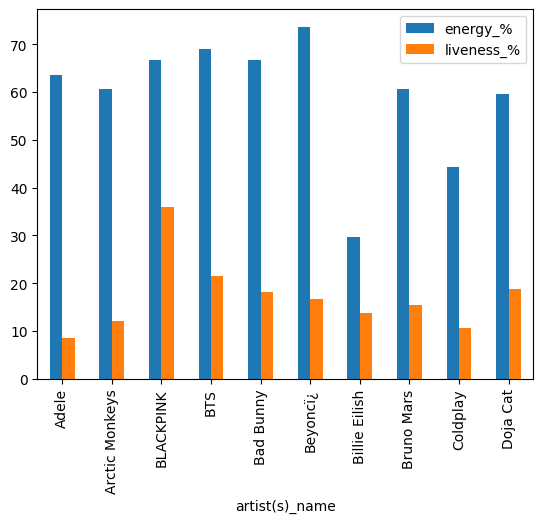

In [49]:
res=more3.index
res1=d[d['artist(s)_name'].isin(res)].groupby('artist(s)_name')[['energy_%','liveness_%']].mean().head(10)
res1.plot(kind='bar')
plt.show()

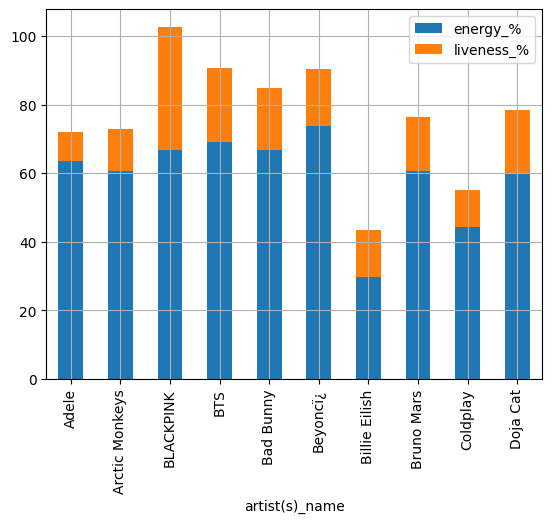

In [52]:
res1.plot.bar(stacked=True)
plt.grid()

array([<AxesSubplot: title={'center': 'energy_%'}, xlabel='artist(s)_name'>,
       <AxesSubplot: title={'center': 'liveness_%'}, xlabel='artist(s)_name'>],
      dtype=object)

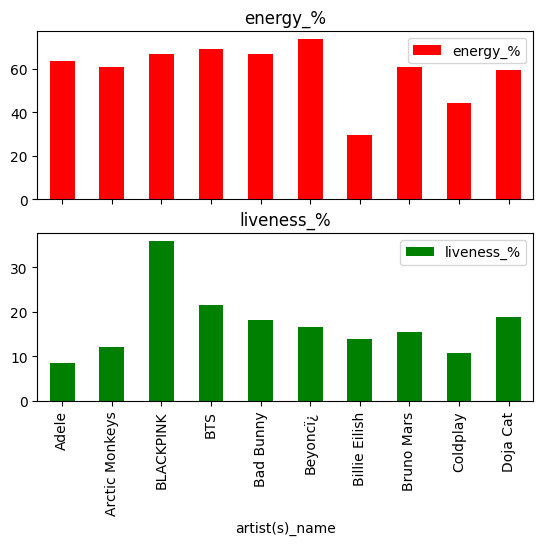

In [55]:
res1.plot.bar(subplots=True,color={'energy_%':'red','liveness_%':'green'})

In [56]:
d.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [64]:
r=d.groupby('released_year')[['danceability_%', 'valence_%']].mean()
r=r.sort_values(by='danceability_%',ascending=False).head(10)
r

,danceability_%,valence_%
released_year,,
1996,89.000000,59.000000
1983,82.000000,73.000000
1999,77.400000,45.200000
1979,75.000000,74.000000
1968,74.000000,76.000000
1997,74.000000,75.000000
2002,73.833333,41.166667
1958,70.666667,83.666667
2023,70.022857,55.080000


<AxesSubplot: xlabel='released_year'>

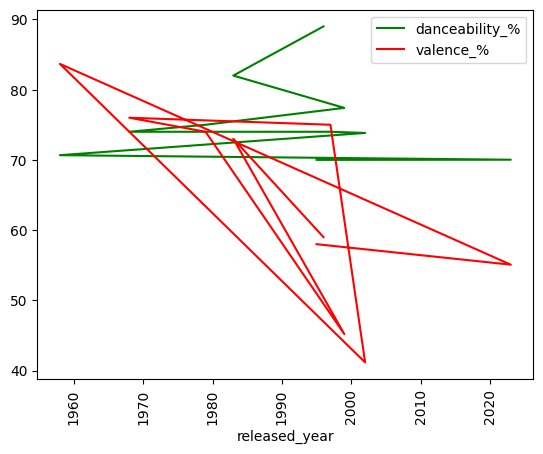

In [65]:
r.plot(kind='line',rot=90,color=['green','red'])

array([<AxesSubplot: xlabel='released_year'>,
       <AxesSubplot: xlabel='released_year'>], dtype=object)

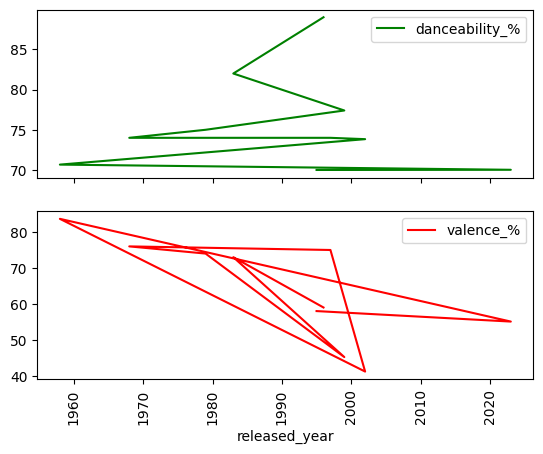

In [66]:
r.plot(kind='line',rot=90,subplots=True,color=['green','red'])

<AxesSubplot: ylabel='speechiness_%'>

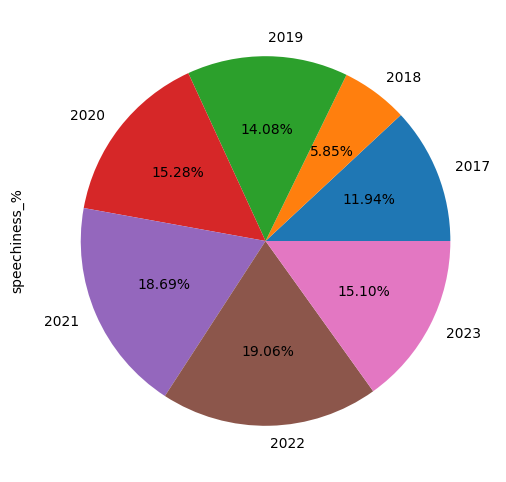

In [78]:
d1=d[d['released_year']>=2017]
r3=d1.groupby('released_year')['speechiness_%'].mean()
plt.figure(figsize=(12,6))
r3.plot(kind='pie',autopct='%.2f%%')

array([<AxesSubplot: ylabel='danceability_%'>,
       <AxesSubplot: ylabel='valence_%'>], dtype=object)

<Figure size 1200x600 with 0 Axes>

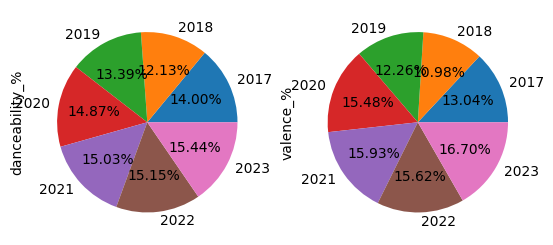

In [81]:
r4=d1.groupby('released_year')[['danceability_%', 'valence_%']].mean()
plt.figure(figsize=(12,6))
r4.plot(kind='pie',subplots=True,autopct='%.2f%%',legend=False)

In [85]:
import time

time.asctime()

'Fri Feb  2 13:31:47 2024'

In [1]:
d={'Name':['Jake','Amy','Rosa','Charles','Gina','Scully','Hitchcock','Raymond'],
   'YOB':[2001,2000,2001,1990,1999,1995,2001,1985],
   'Age':[21,22,21,32,23,27,21,37],
   'Python':[100,90,91,98,92,95,97,100],
   'SQL':[90,100,91,92,98,95,93,99],
   'Statistics':[93,89,99,92,94,92,90,98]}

In [24]:
import pandas as pd 
import matplotlib.pyplot as plt 
df=pd.DataFrame(d)

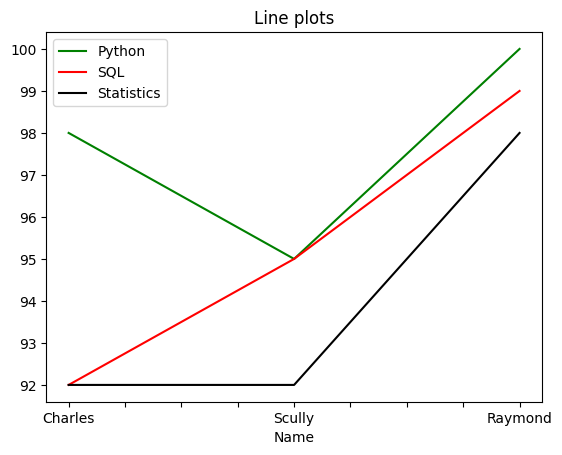

In [30]:
age=(df['Age']>24)
ax=plt.gca()
df1=df.loc[age]
df1.plot(kind='line', x='Name',y='Python', color='green',ax=ax)
df1.plot(kind='line', x='Name',y='SQL', ax=ax,color='red')
df1.plot(kind='line',x='Name',y='Statistics',ax=ax,color='black')
plt.title("Line plots")
plt.show()


<Axes: ylabel='Python'>

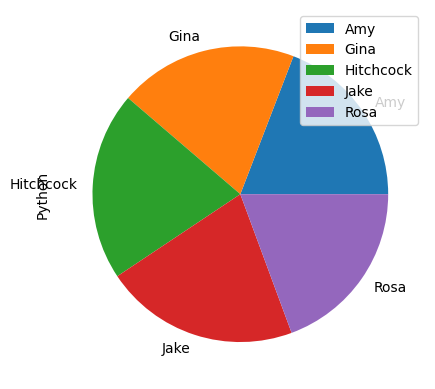

In [35]:
new_df1=(df['Age']<=25)
df2=df.loc[new_df1]
df2.head()
df2.groupby(['Name']).sum().plot(kind='pie',y='Python')

<Axes: xlabel='Name'>

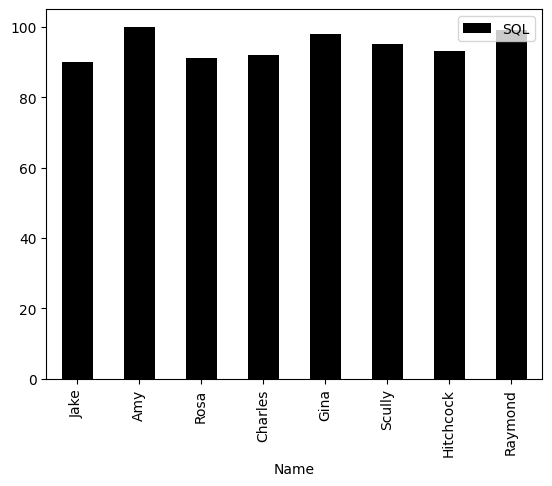

In [36]:
df.plot(kind='bar', x='Name',y='SQL',color='black')

<Axes: xlabel='SQL', ylabel='Statistics'>

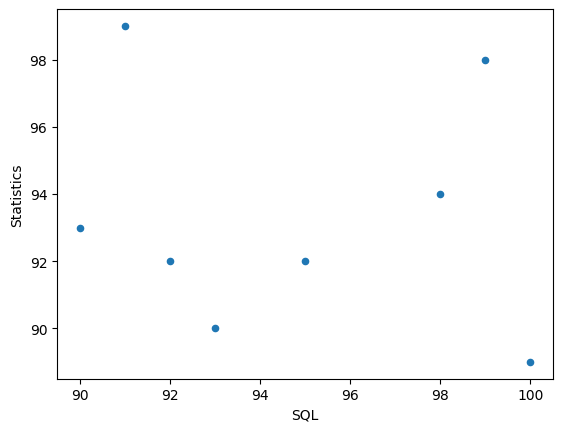

In [38]:
df.plot(kind='scatter',x='SQL',y='Statistics')

In [39]:
df.describe()

,YOB,Age,Python,SQL,Statistics
count,8.000000,8.000000,8.000000,8.00000,8.000000
mean,1996.500000,25.500000,95.375000,94.75000,93.375000
std,6.047432,6.047432,3.997767,3.84522,3.543102
min,1985.000000,21.000000,90.000000,90.00000,89.000000
25%,1993.750000,21.000000,91.750000,91.75000,91.500000
50%,1999.500000,22.500000,96.000000,94.00000,92.500000
75%,2001.000000,28.250000,98.500000,98.25000,95.000000
max,2001.000000,37.000000,100.000000,100.00000,99.000000
